### Program written by Scott Midgley, 2021

Scope: To train and test LR models for band gap energy screening in the configuraional space of MgO-ZnO solid solutions. 

In [1]:
### USER INPUT REQUIRED ###

# Please paste in the path to the repositiory here an comment/uncomment as needed.
# E.g. rundir = r'C:\Users\<user>\Desktop\repository'

# Windows path
#repodir = r'<windows\path\here>'
#repodir = r'C:\Users\smidg\Desktop\ml\repository'

#Unix path
#repodir = '<unix/path/here>'
repodir = r'/home/mts87985/ml-thermo/Machine-Learning-for-Solid-Solutions/repository/'

In [2]:
### USER INPUT REQUIRED ###

# Define percentage of training data to use for training. 
split = 10
#split = 50
#split = 80
#split = 30

In [3]:
# Import modules. 
import pandas as pd
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import pickle
import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import os
from sklearn.linear_model import Lasso

In [4]:
# Start program timer.
start_time = time.time()

In [6]:
# Import data and shuffle (optional).
eners = pd.read_pickle(repodir + '/data/input_data.pkl')
eners = eners.sample(frac=1)
# Split data frame into training, validation, and testing data. 
if split == int(10):
    e_train = eners.iloc[1608:2412] #10% of data for training
elif split == int(30):
    e_train = eners.iloc[1608:4021] #30% of data for training
elif split == int(50):
    e_train = eners.iloc[1608:5630] #50% of data for training
elif split == int(80):
    e_train = eners.iloc[1608:] #80% of data for training
else:
    print('Error: please choose a valid train/test split.')
e_val = eners.iloc[804:1608] #10% of data for validation
e_test = eners.iloc[:804] #10% of data for testing model

In [7]:
# Convert Pandas columns to Numpy arrays. Reshaping to obtain array of nested brackets. 
Xtrain = e_train['Coulomb'].to_numpy()
ytrain = e_train['BGE'].to_numpy()
Xtrain = np.stack(Xtrain)
ytrain= np.stack(ytrain) 
Xval = e_val['Coulomb'].to_numpy()
yval = e_val['BGE'].to_numpy()
Xval = np.stack(Xval)
yval= np.stack(yval)
Xtest = e_test['Coulomb'].to_numpy()
ytest = e_test['BGE'].to_numpy()
Xtest = np.stack(Xtest)
ytest = np.stack(ytest)

In [8]:
# Define Lasso regularizer and train regressor.
lasso_reg = Lasso(alpha=0.0000001)
lasso_reg.fit(Xtrain, ytrain)

/home/mts87985/anaconda3/envs/ml-solid-solns/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.46976214990426673, tolerance: 0.0016831740423950625
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1e-07)

In [9]:
# Print parameters.
r_sq = (lasso_reg.score(Xtrain, ytrain))
inter = ('intercept: ', lasso_reg.intercept_)
coef = ('coefficient:  ', lasso_reg.coef_)
print(r_sq)
print(inter)
print(coef)

0.9443051787970326
('intercept: ', -175.25765577753444)
('coefficient:  ', array([-8.60329940e-04,  6.40826872e-04,  4.35082350e-04, -2.96066718e-04,
       -2.83506230e-04, -5.80144979e-04, -7.27910648e-04, -8.16397556e-04,
        4.04359055e-04,  1.17676500e-02,  1.13969769e-02,  1.21891241e-02,
        1.26823210e-02,  1.29781761e-02,  1.12589481e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -8.11373530e-03,
       -1.06897811e-02, -1.77562555e-02, -2.14824461e-02, -3.82400389e-02,
       -9.71251240e-03, -5.18971954e-03, -7.44942975e-05,  4.12352355e-03,
        2.28100744e-03,  3.38773821e-03,  5.96472600e-03,  3.80467959e-03,
        2.25360585e-02, -5.09928134e-02, -4.75486560e-02, -2.51167021e-02,
       -2.70248018e-02, -1.47698441e-02, -3.07666352e-02,  6.09201966e-01,
        5.90177010e-01,  1.28352023e+00,  0.00000000e+00,  1.57918836e-01,
        3.33002556e-01,  3.76858576e-01,  4.30999903e-01,  5.39744009e-01,
        4.35627295e-01,  

In [10]:
# Test linear regressor.
ypred = lasso_reg.predict(Xtest)

In [11]:
# Print metric.
mae = (mean_absolute_error(ytest, ypred))
print('mae = ', mae)

mae =  0.030438837584618614


Text(0, 0.5, 'Regressor')

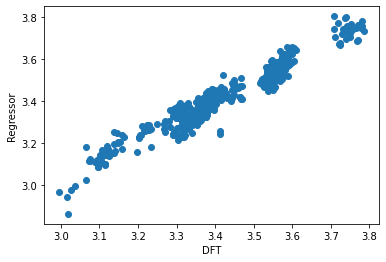

In [12]:
#Plot DFT Band gap energy vs regressor predicted.
plt.scatter(ytest, ypred)# plot the predicted versus the actual gaps
plt.xlabel('DFT')
plt.ylabel('Regressor')
#plt.savefig('BGE_pred_vs_val.png')

In [13]:
# Print time taken by program to run. 
time_s = round((time.time() - start_time), 2)
time_m = round((time_s/60), 2)
print(time_s,'sec')
print(time_m, 'min')

113.29 sec
1.89 min
